In [160]:
import tensorflow as tf
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
import tensorflow as tf
from keras.models import Sequential
from keras import layers,regularizers,models
from keras.layers import Input,Dense,Dropout
from keras.models import Model
from keras.utils.vis_utils import plot_model

In [151]:
train_data=pd.read_csv('/Users/elena/Documents/cs-training.csv')
test_data=pd.read_csv('/Users/elena/Documents/cs-test.csv')
train_data.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [152]:
test_data.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [153]:
col_names = train_data.columns.values

col_names[0]='ID'

train_data.columns=col_names


col_names_test = test_data.columns.values
col_names_test [0]='ID'
test_data.columns=col_names_test

In [43]:
print('Top 5 data ponints')
train_data.head()

Top 5 data ponints


,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [154]:
print('Top 5 data ponints')
test_data.head()

Top 5 data ponints


,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [155]:
print('Number of trainng data pointes {}'.format(train_data.shape))
print('Number of test data pointes {}'.format(test_data.shape))

Number of trainng data pointes (150000, 12)
Number of test data pointes (101503, 12)


In [45]:
coor_matrix=train_data.corr()
coor_matrix["SeriousDlqin2yrs"].sort_values(ascending=False)

SeriousDlqin2yrs                        1.000000
NumberOfTime30-59DaysPastDueNotWorse    0.125587
NumberOfTimes90DaysLate                 0.117175
NumberOfTime60-89DaysPastDueNotWorse    0.102261
NumberOfDependents                      0.046048
ID                                      0.002801
RevolvingUtilizationOfUnsecuredLines   -0.001802
NumberRealEstateLoansOrLines           -0.007038
DebtRatio                              -0.007602
MonthlyIncome                          -0.019746
NumberOfOpenCreditLinesAndLoans        -0.029669
age                                    -0.115386
Name: SeriousDlqin2yrs, dtype: float64

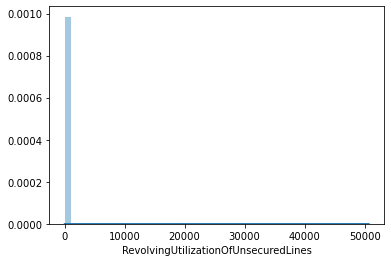

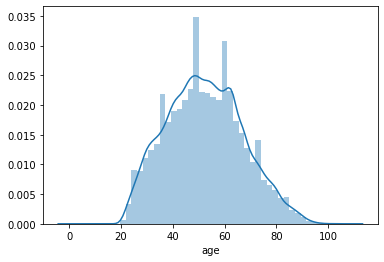

/Users/elena/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


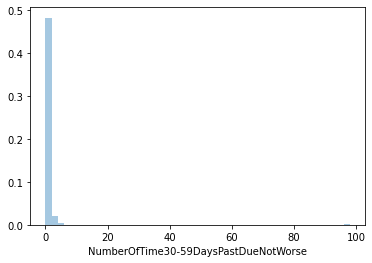

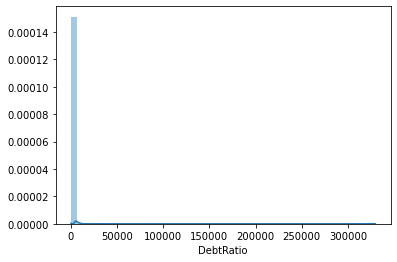

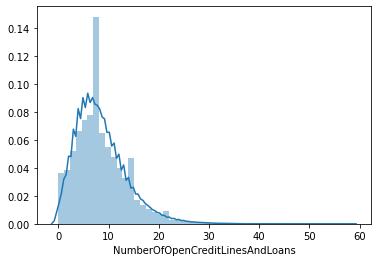

/Users/elena/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


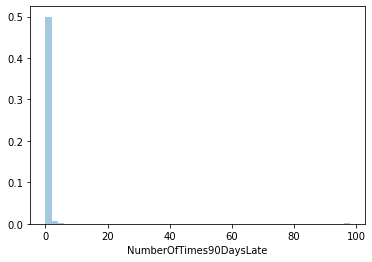

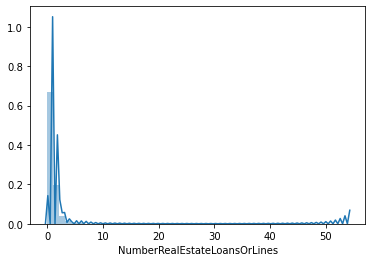

/Users/elena/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


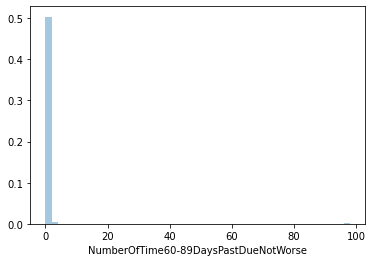

In [46]:
#remove the ones with Nan to see distibuition
feature_list=list(train_data.columns.values)
remove_list = ['ID','SeriousDlqin2yrs','MonthlyIncome','NumberOfDependents']
for each in remove_list:
    feature_list.remove(each)

for each in feature_list:
    sns.distplot(train_data[each])
    plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

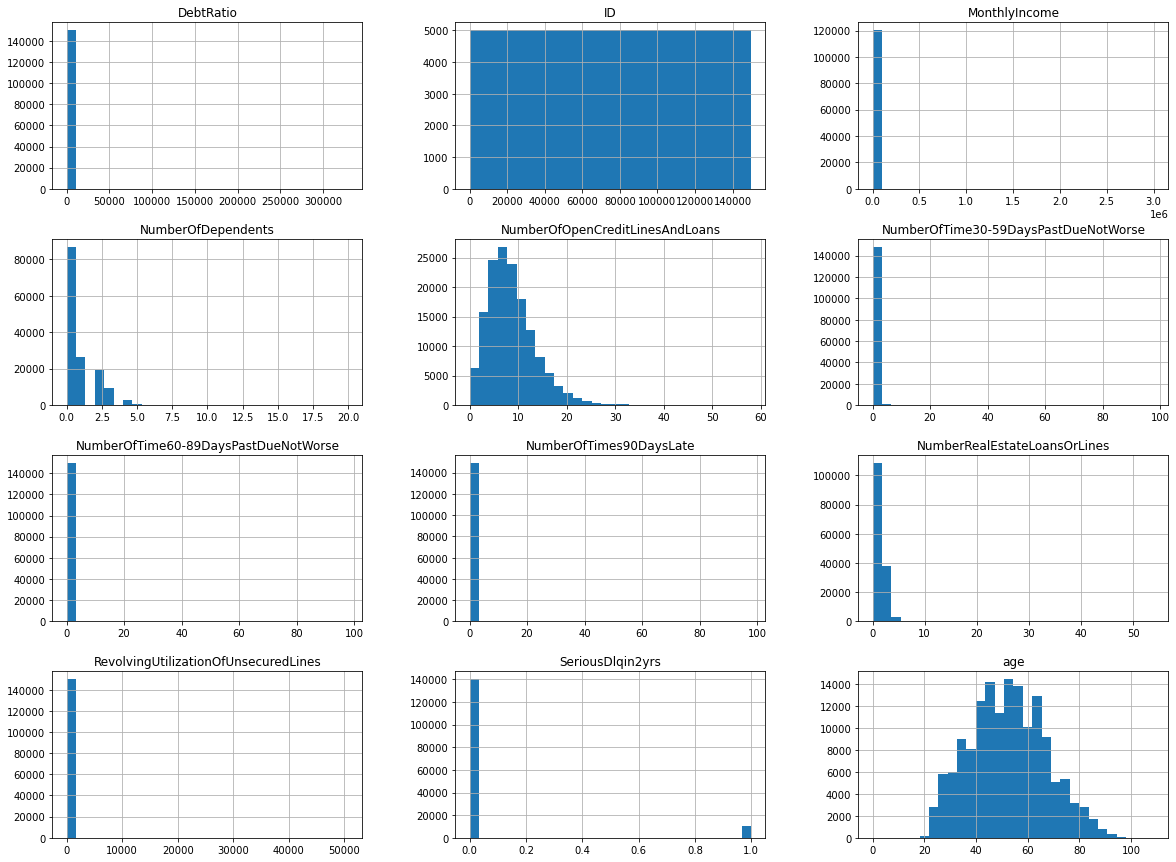

In [47]:
train_data.hist(bins=30,figsize=(20,15))
plt.show


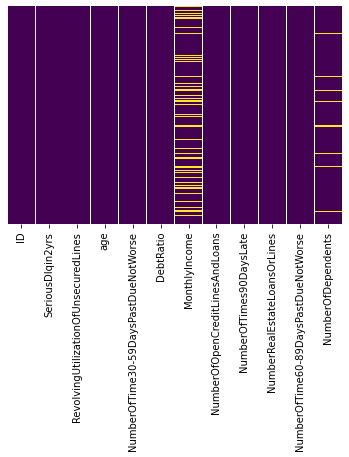

In [48]:
sns.heatmap(train_data.isnull(), cbar = False , 
            yticklabels = False , cmap = 'viridis')


In [49]:
#we can replace monthly income with mean
#with large data set we gonna pop the ones of number of dependies as they are few
pd.isnull(train_data).sum(axis=0)

ID                                          0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [156]:
pd.isnull(test_data).sum(axis=0)

ID                                           0
SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                            20103
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                        2626
dtype: int64

In [157]:

train_data.dropna(axis=0,how='any',subset=['MonthlyIncome'],inplace=True)
test_data.dropna(axis=0,how='any',subset=['MonthlyIncome'],inplace=True)
pd.isnull(train_data).sum(axis=0)

ID                                      0
SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [158]:
pd.isnull(test_data).sum(axis=0)

ID                                          0
SeriousDlqin2yrs                        81400
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                               0
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                          0
dtype: int64

In [51]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120269 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   ID                                    120269 non-null  int64  
 1   SeriousDlqin2yrs                      120269 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  120269 non-null  float64
 3   age                                   120269 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  120269 non-null  int64  
 5   DebtRatio                             120269 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       120269 non-null  int64  
 8   NumberOfTimes90DaysLate               120269 non-null  int64  
 9   NumberRealEstateLoansOrLines          120269 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  120269 non-null  int64  
 11  

In [53]:
train_data.describe()

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,120269.000000,120269.000000,120269.000000,120269.000000,120269.000000,120269.000000,1.202690e+05,120269.000000,120269.000000,120269.000000,120269.000000,120269.000000
mean,75026.012514,0.069486,5.899873,51.289792,0.381769,26.598777,6.670221e+03,8.758475,0.211925,1.054519,0.187829,0.851832
std,43286.029117,0.254280,257.040685,14.426684,3.499234,424.446457,1.438467e+04,5.172835,3.465276,1.149273,3.447901,1.148391
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37678.000000,0.000000,0.035084,40.000000,0.000000,0.143388,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,74969.000000,0.000000,0.177282,51.000000,0.000000,0.296023,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112494.000000,0.000000,0.579428,61.000000,0.000000,0.482559,8.249000e+03,11.000000,0.000000,2.000000,0.000000,2.000000
max,150000.000000,1.000000,50708.000000,103.000000,98.000000,61106.500000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [54]:
train_data.head()

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [159]:
labels=train_data["SeriousDlqin2yrs"].copy()

In [96]:
train_data=train_data.drop(["SeriousDlqin2yrs"], axis=1)
train_data=train_data.drop(["ID"], axis=1)



KeyError: "['SeriousDlqin2yrs'] not found in axis"

In [97]:
train_data.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [101]:
def z_score(df):
    # copy the dataframe
    df_std = df.copy()
    # apply the z-score method
    for column in df_std.columns:
        df_std[column] = (df_std[column] - df_std[column].mean()) / df_std[column].std()
        
    return df_std
    
# call the z_score function
df_standardized = z_score(train_data)

df_standardized

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,-0.019973,-0.435983,0.462453,-0.060775,0.170305,0.819961,-0.061157,4.303137,-0.054476,0.999806
1,-0.019229,-0.782563,-0.109101,-0.062380,-0.282955,-0.919897,-0.061157,-0.917553,-0.054476,0.129022
2,-0.020392,-0.921195,0.176676,-0.062466,-0.252228,-1.306532,0.227421,-0.917553,-0.054476,-0.741761
3,-0.022043,-1.475723,-0.109101,-0.062582,-0.234292,-0.726579,-0.061157,-0.917553,-0.054476,-0.741761
4,-0.019424,-0.158719,0.176676,-0.062608,3.956835,-0.339944,-0.061157,-0.047438,-0.054476,-0.741761
...,...,...,...,...,...,...,...,...,...,...
149994,-0.021452,-0.089403,-0.109101,-0.061714,-0.227341,-0.339944,-0.061157,-0.917553,-0.054476,-0.741761
149995,-0.022795,1.574181,-0.109101,-0.062137,-0.317715,-0.919897,-0.061157,-0.047438,-0.054476,-0.741761
149996,-0.021787,-0.505299,-0.109101,-0.060979,-0.075512,-0.919897,-0.061157,-0.047438,-0.054476,0.999806
149998,-0.022953,-1.475723,-0.109101,-0.062667,-0.066336,-0.919897,-0.061157,-0.917553,-0.054476,-0.741761


In [120]:
labels

0         1
1         0
2         0
3         0
4         0
         ..
149994    0
149995    0
149996    0
149998    0
149999    0
Name: SeriousDlqin2yrs, Length: 120269, dtype: int64

In [118]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_standardized, labels, test_size=0.3, random_state=5)

In [122]:
print(train_data.shape[1])

10


In [146]:
from keras import models, layers,regularizers,optimizers


#using sequential layers that stack on one another
#input shape is shape of inputs, with rely activation neuron used excpet last layer that is sigmoid to measure true or false
#loss metrick use is crossentropy sice its just two cases measures
#and metric of measurement is accuracy ,optimizer used is rmsprop any other optimizer is fine
# such as adam or SGD which is the comonly used one



model = Sequential()

model.add(Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))

model.add(Dense(1, activation='sigmoid'))


In [147]:

optimizer1=tf.keras.optimizers.RMSprop(learning_rate= 0.001, momentum=0.9, name="rmsprop")
model.compile(loss='binary_crossentropy', 
              optimizer=optimizer1,
              metrics=['acc'])

epochs_=50

model.fit(X_train,y_train ,
           validation_data=(X_test, y_test),
           epochs=epochs_, batch_size=512)

Epoch 1/50
165/165 [==============================] - 0s 3ms/step - loss: 0.2272 - acc: 0.9268 - val_loss: 0.2085 - val_acc: 0.9310
Epoch 2/50
165/165 [==============================] - 0s 3ms/step - loss: 0.2005 - acc: 0.9324 - val_loss: 0.2008 - val_acc: 0.9337
Epoch 3/50
165/165 [==============================] - 0s 2ms/step - loss: 0.1995 - acc: 0.9334 - val_loss: 0.1977 - val_acc: 0.9337
Epoch 4/50
165/165 [==============================] - 0s 3ms/step - loss: 0.1988 - acc: 0.9335 - val_loss: 0.2021 - val_acc: 0.9330
Epoch 5/50
165/165 [==============================] - 0s 3ms/step - loss: 0.1992 - acc: 0.9332 - val_loss: 0.1984 - val_acc: 0.9338
Epoch 6/50
165/165 [==============================] - 0s 3ms/step - loss: 0.1982 - acc: 0.9336 - val_loss: 0.1983 - val_acc: 0.9334
Epoch 7/50
165/165 [==============================] - 0s 2ms/step - loss: 0.1980 - acc: 0.9343 - val_loss: 0.1993 - val_acc: 0.9337
Epoch 8/50
165/165 [==============================] - 0s 3ms/step - loss: 0.

In [163]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                704       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 2,817
Trainable params: 2,817
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)